# Relationship between Research and development expenditure and the Human Development Index Values.

## Introduction

The aim of this project is to study the intricate relationship between countries's investment to research and development and the resultant impact on its human development outcomes.

The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

By allocating resources to scientific inquiry, technological innovation and knowledge creation, there can be  potential ripple effects on education, healthcare and overall quality of life.

By comprehensively examining the patterns, trends and correlations, it could be possible to verify this potential relationship. This analysis could provide key insights to further help with evidence based decision making process.

## Methods

### Data sources:
#### Data Source 1: Research and development expenditure (% of GDP)
* Link : https://api.worldbank.org/v2/en/indicator/GB.XPD.RSDV.GD.ZS?downloadformat=excel
* Source Organisation : UNESCO Institute for Statistics (UIS). UIS.Stat Bulk Data Download Service
* License : CC BY-4.0  

#### Data Source 2: Trends in the Human Development Index, 1990-2021
* Link : https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Statistical_Annex_HDI_Trends_Table.xlsx
* Source Organisation: Human Development Reports
* License : CC BY-3.0 

### Import Modules

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Data Transformation

All initial data cleaning and transformation is done in [project/load_data.py](../project/load_data.py). After transformation the data from excel files in loaded as tables in Sql database. Some transformations like converting column types as per requirement and calculating new fields has been done in steps below.

### Connect to Database and Load Tables

&#9632; The database contains three tables:
- __worldbank__ : Research and development expenditure (% of GDP) for countries over the years : 1960-2022
- __hdr__ : Human Development Index Values for countries for the years : 1990,2000,2010,2015,2018,2019,2020,2021 and Average annual HDI growth for 1990-2000, 2000-2010, 2010-2021, 1990-2021 (Average annual HDI growth : A smoothed annualized growth of the HDI in a given period, calculated as the annual compound growth rate.)
- __metadata__ : Countries classified in various income groups (Low, High, Upper Middle, Lower Middle)

In [3]:
conn = sqlite3.connect("../data/DatasetDB.db")
cur = conn.cursor()

In [4]:
worldbank = pd.read_sql("select * from worldbank",conn)
hdr = pd.read_sql("select * from HDR",conn)
metadata = pd.read_sql("select * from metadata_countries",conn)

## Results

#### Convert Columns to Numeric types

In [5]:
columns = ['HDI rank','1990', '2000', '2010', '2015', '2018', '2019',
       '2020', '2021', '2015-2021', '1990-2000', '2000-2010', '2010-2021',
       '1990-2021']
for col in columns:
    hdr[col]=pd.to_numeric(hdr[col],errors ='coerce')
hdr.fillna(0,inplace=True)

columns = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
for col in columns:
    worldbank[col] = pd.to_numeric(worldbank[col],errors ='coerce')
worldbank = worldbank.round(2)
hdr = hdr.round(2)

#### Calculate mean expenditure over the durations: 1990-2000, 2000-2010, 2010-2021, 1990-2021

In [6]:
col = ['1990', '1991', '1992', '1993', '1994', '1995','1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018','2019','2020','2021']

agg_90_00 = worldbank[col[0:11]].mean(axis=1)
agg_00_10 = worldbank[col[10:21]].mean(axis=1)
agg_10_21 = worldbank[col[20:32]].mean(axis=1) 
agg_90_21 = worldbank[col].mean(axis=1)

wb = worldbank[['Country Name','Country Code']].copy()
wb['1990-2000'] = agg_90_00
wb['2000-2010'] = agg_00_10
wb['2010-2021'] = agg_00_10
wb['1990-2021'] = agg_90_21

In [7]:
year=['2000','2010','2015','2018','2020','2021']
merge = pd.merge(worldbank[['Country Name',*year]],hdr[['Country',*year]],left_on='Country Name',right_on='Country')
merge.drop(['Country'],axis=1,inplace=True)
merge.set_index('Country Name',inplace=True)
merge.index.name=None

#### Comparision between trends in R&D expenditure and HDI values over the period 2000-2021

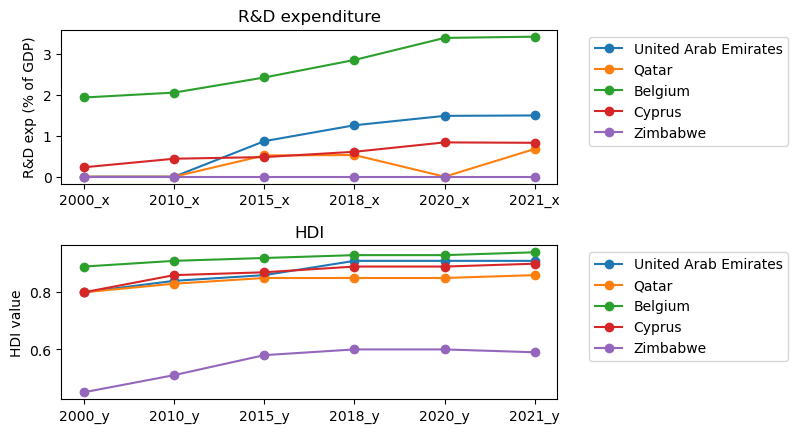

In [8]:
fig,ax=plt.subplots(2,1)

l=[4,126,12,37,166]

for i in l:
    ax[0].plot(merge.iloc[i,0:6],marker='o',label=f'{merge.iloc[i].name}')
    ax[1].plot(merge.iloc[i,6:14],marker='o',label=f'{merge.iloc[i].name}')

plt.subplots_adjust(hspace=0.4)
ax[0].set_ylabel("R&D exp (% of GDP)")
ax[1].set_ylabel('HDI value')
ax[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax[0].set_title('R&D expenditure')
ax[1].set_title('HDI')
#fig.suptitle(f'{merge.iloc[i].name}')
plt.show()

from the above plots it can be observed that the HDI values have increased over years, but there is no direct or significant effect of expenditure on this increase. For example, for Qatar, though the expenditure decreased in 2020, the HDI value continue to increase the next year in 2021. However this cannot be taken as a decisive result to draw relationship because the effect of Research and developement on actual human growth cannot be observed in just one or two years, so we must look at correlation over longer period of time.

#### Correlation between Mean Expenditure from 1990-2021 and HDI values in different years

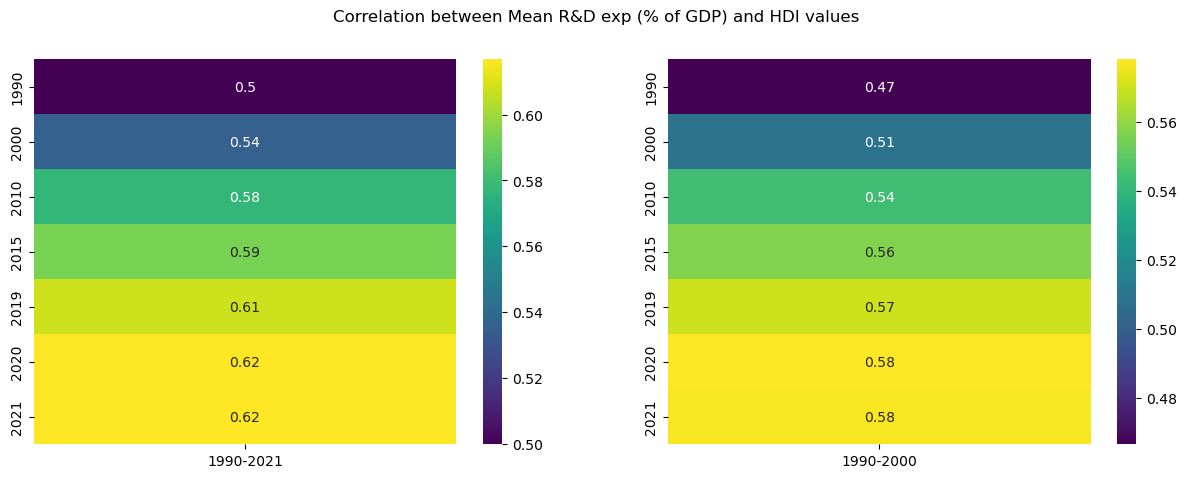

In [9]:
#corr_df = wb[['Country Name','1990-2021']].merge(hdr[['Country','1990','2000','2010','2015','2019','2020','2021']],left_on = 'Country Name',right_on='Country')
fig,ax=plt.subplots(1,2,figsize=(15,5))
corr_df = wb.merge(hdr[['Country','1990','2000','2010','2015','2019','2020','2021']],left_on = 'Country Name',right_on='Country')
corr_df.drop(['Country','Country Code'],axis=1,inplace=True)
corr_df.set_index('Country Name',inplace=True)
corr_df.index.name=None
corr = corr_df.corr()['1990-2021']
corr2 = corr_df.corr()['1990-2000']
corr=corr.iloc[4:]
corr2=corr2.iloc[4:]
sns.heatmap(corr.to_frame(),cmap='viridis',annot=True,ax=ax[0])
sns.heatmap(corr2.to_frame(),ax=ax[1],annot=True,cmap='viridis')
plt.suptitle("Correlation between Mean R&D exp (% of GDP) and HDI values")
plt.show()

In the above heatmaps we can observe that the correlation between the mean expenditure over a given duration and HDI values, increases over years. Hence we can see that the correlation between investment done over 1990-2021 period is higher for years 2019,2020,2021 as compared to earlier years. Same for 1990-2000. This gives us an idea that the value of HDI is somewhat correlated to expenditure but this relationship is more visible over longer durations as compared to immediate following years.

#### Grouping Countries by HDI category (High, Medium, Low) based on HDI value in 2021
&#9632; As per __Human development report__, the Human development classification is a follows:
- HDI of less than 0.550 for low human development, 0.550–0.699 for medium human development, 0.700–0.799 for high human development and 0.800 or greater for very high human development.

In [10]:
hdi = hdr[['Country','HDI rank','2021']]
wb_mean = wb[['Country Name','Country Code','1990-2021']].copy()
merge_hdi = wb_mean.merge(hdi,left_on='Country Name',right_on='Country')
merge_hdi['hdi_category'] = pd.cut(merge_hdi['2021'],bins = [-float('inf'),0.550,0.7,0.8,float('inf')],labels = ['Low','Medium','High','Very High'],right=False)


The below given plot is to find the number of countries in each HDI category and the combined mean expenditure. We look at HDI value of 2021 and expenditure over 1990-2021

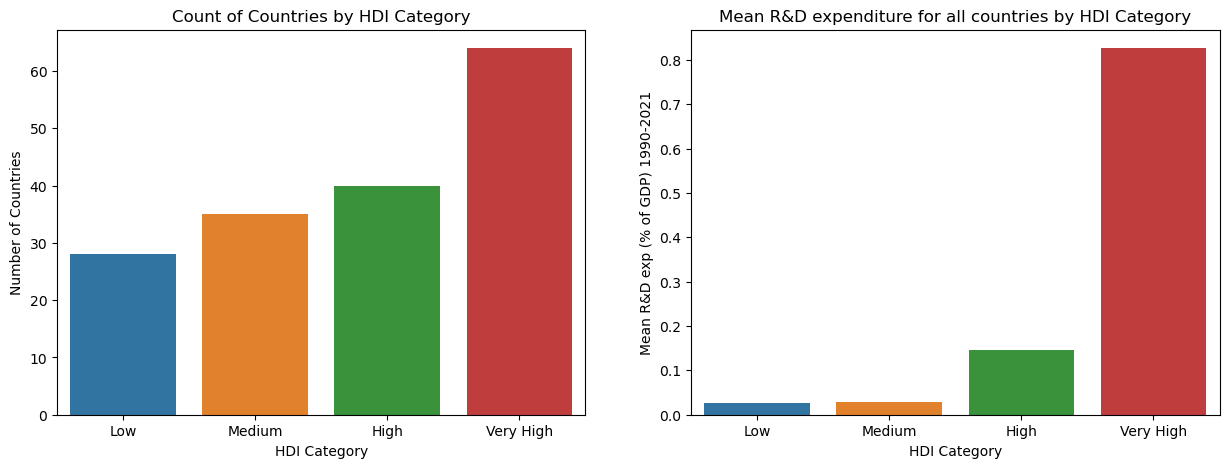

In [11]:
df_group = merge_hdi.groupby('hdi_category')['Country'].count().reset_index()
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df_group,x='hdi_category',y='Country',ax=ax[0])

df_group2 = merge_hdi.groupby('hdi_category')['1990-2021'].mean().reset_index()
sns.barplot(data = df_group2,x='hdi_category',y='1990-2021')

ax[0].set_title('Count of Countries by HDI Category')
ax[0].set_xlabel('HDI Category')
ax[0].set_ylabel('Number of Countries')

ax[1].set_title('Mean R&D expenditure for all countries by HDI Category')
ax[1].set_xlabel('HDI Category')
ax[1].set_ylabel('Mean R&D exp (% of GDP) 1990-2021')

plt.show()

From the plot __"Mean R&D expenditure for all countries by HDI Category"__, we can observe that very high HDI countries allocate significantly higher resources to R&D

#### Income Groups

Now lets take a look at various Income Groups and its relationship with HDI values and Expenditure

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [13]:
col=['Country Code','IncomeGroup','TableName']
merge_meta = world.merge(metadata[col],left_on = 'iso_a3',right_on = 'Country Code')
merge_hdi_world = world.merge(merge_hdi,left_on='iso_a3',right_on='Country Code')

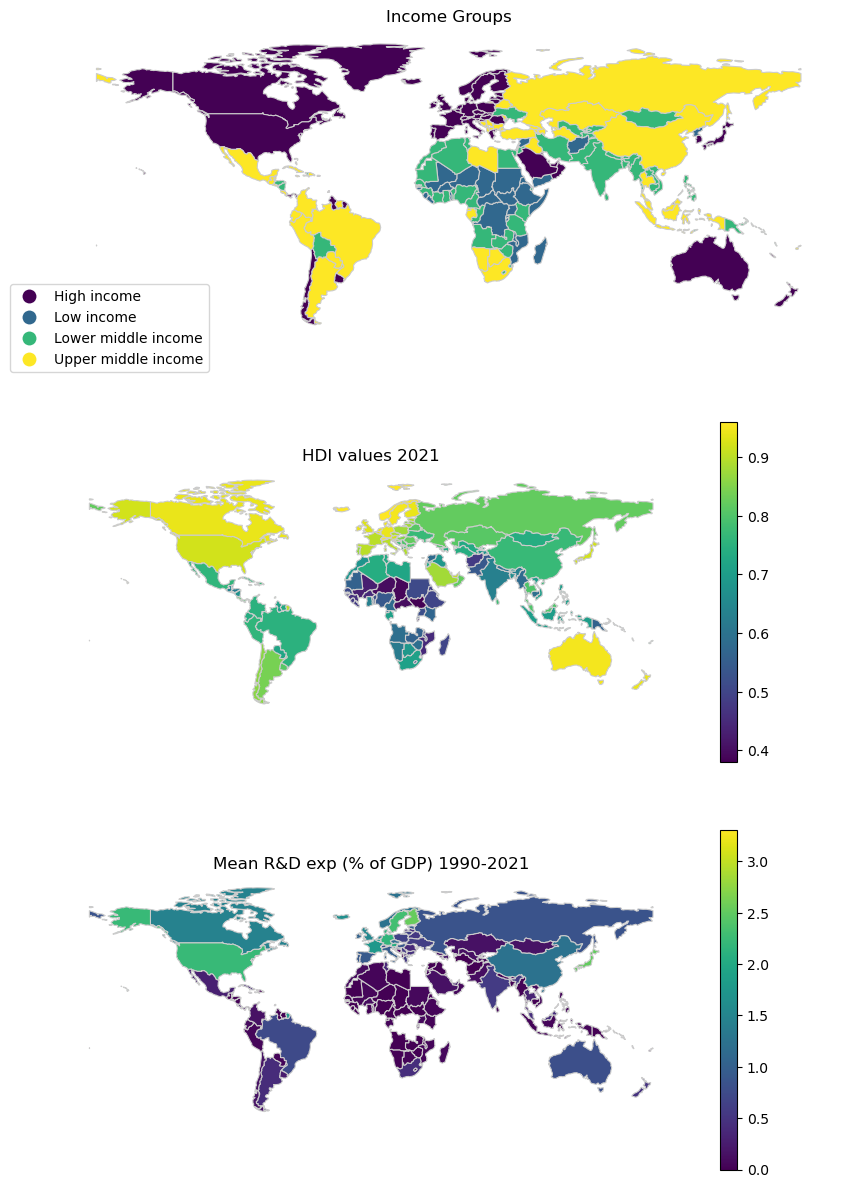

In [14]:
fig, ax = plt.subplots(3,1,figsize=(10,15)) 
merge_meta.plot(column = 'IncomeGroup',cmap = 'viridis',legend=True,ax=ax[0],linewidth=0.8,edgecolor='0.8')
merge_hdi_world.plot(column = '2021',cmap = 'viridis',legend=True,ax=ax[1],linewidth=0.8,edgecolor='0.8')
merge_hdi_world.plot(column = '1990-2021',cmap = 'viridis',legend=True,ax=ax[2],linewidth=0.8,edgecolor='0.8')
legend1 = ax[0].get_legend()
legend2 = ax[1].get_legend()
legend1.set_bbox_to_anchor((0.2,0.2))
#legend2.set_bbox_to_anchor((1.2,1))
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
ax[0].set_title("Income Groups")
ax[1].set_title("HDI values 2021")
ax[2].set_title("Mean R&D exp (% of GDP) 1990-2021")
plt.show()

The high and upper middle Income group countries tend to show higher HDI value. Some of these High HDI countries have high expenditure, but there are also countries with high HDI but comparitively low expenditure. However, no country with low expenditure has a High HDI. Also, Countries with Low and Lower Middle Income has Low HDI, as demonstrated by plot below. All High Income groups have very High or High HDI.

In [15]:
sns.countplot(data=meta_hdi, x='hdi_category', hue='IncomeGroup')
plt.title("Count of Countries in various HDI categories and Income Groups")
plt.xlabel('HDI Category')
plt.show()

NameError: name 'meta_hdi' is not defined

By the above plots, it may seem like HDI is more closely related to Income groups. Lets verify this idea by plotting a graph between Income groups and HDI categories.

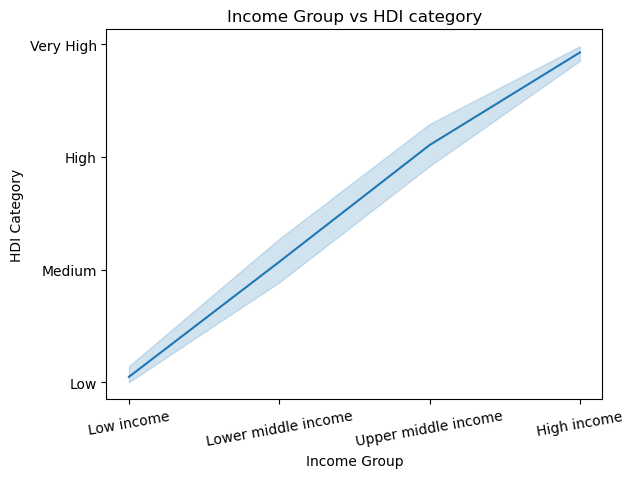

In [16]:
meta_hdi = merge_hdi.merge(metadata,on='Country Code')
cat_ig = meta_hdi[['Country','hdi_category','IncomeGroup']]
cat_ig.set_index('Country',inplace=True)
cat_ig.index.name=None
sns.lineplot(data = meta_hdi,y='hdi_category',x='IncomeGroup')
plt.xticks(rotation=10)
plt.ylabel("HDI Category")
plt.xlabel("Income Group")
plt.title("Income Group vs HDI category")
plt.gca().invert_yaxis()
plt.show()

Here we see an increase in HDI category with increase in Income Group. Next let's see the relationship between HDI, Expenditure and Income group.

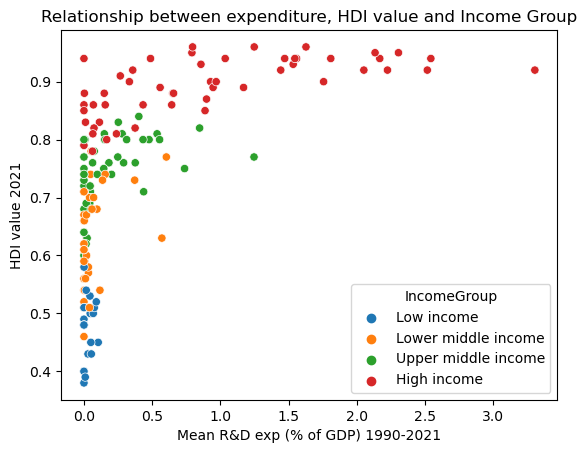

In [17]:
sns.scatterplot(data=meta_hdi,x='1990-2021',y='2021',hue='IncomeGroup')
plt.xlabel("Mean R&D exp (% of GDP) 1990-2021")
plt.ylabel("HDI value 2021")
plt.title("Relationship between expenditure, HDI value and Income Group")
plt.show()

It can observed from the above plot that countries in higher income group have higher HDI, but the R&D expenditure varies. There are countries with low expenditure but are in high Income group and have high HDI. But the countries with low expenditure and low income group always have low or medium HDI.

## Conclusion

The analysis shows that there is some impact of R&D expenditure on overall HDI growth, but the results are not decisive. As there were many examples of less expenditure but high HDI. The most import factor for HDI was observed to be Income Groups. Countries with Higher income have higher HDI regardless of R&D expenditure. We also observed that Countries with high Income Group are the only ones spending more on R&D.

However it is important to mention that we only considered the Gross domestic expenditures on research and development (R&D),including both capital and current expenditures in the four main sectors: Business enterprise, Government, Higher education and Private non-profit. This tells us about the spending in basic research, applied research and experimental development. It is expected that countries spending more should have higher impact on Human development, but as we did not consider the actual return on these spendings, we were not able to reach on a decisive conclusion. Spending alone is not sufficient to decide whether there will be growth or not. This brings us back to our motivation of supporting evidence-based decision making. Looking at this analysis have concluded that we cannot rely on investments alone. A country spending more does not necessarily imply more growth. The opposite might be more true, countries with higher income and development tend to spend more towards research. HDI depends on multiple factor hence taking decisions solely based on budgets is not reliable. We need to see the returns and outcomes of R&D. Whether these investments were actually successful to generate some value or not would give a better idea. 